In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.initializers import glorot_uniform
from keras.models import Model, load_model
from keras.preprocessing import image
import pydot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

In [36]:
cifar10=tf.keras.datasets.cifar10

In [37]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 2s 0us/step


In [40]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

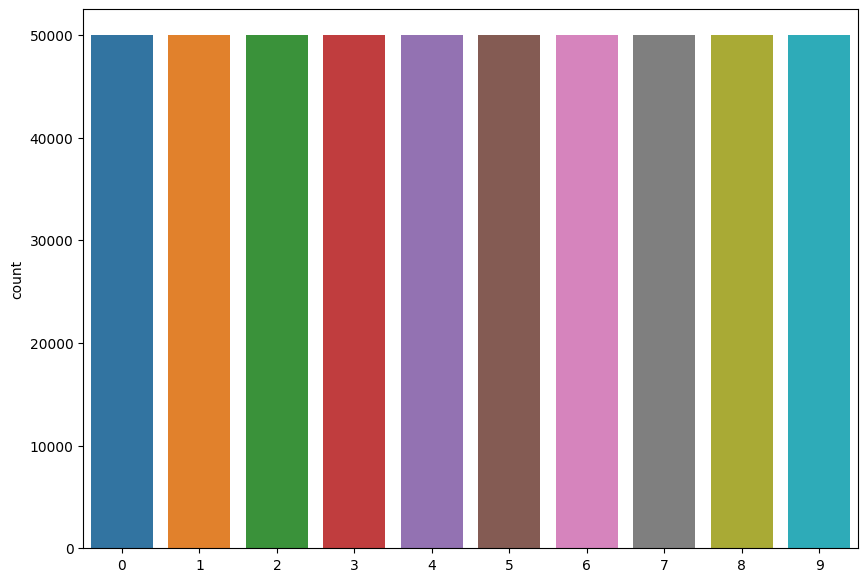

In [41]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,7))
p = sns.countplot(y_train)
p.set_xticklabels=classes
plt.show()

In [42]:
np.isnan(x_train).any()

False

In [43]:
np.isnan(x_test).any()

False

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


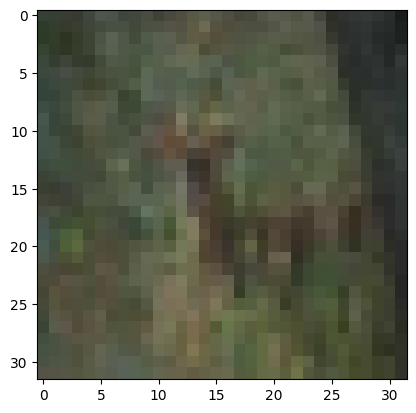

In [44]:
plt.imshow(x_train[10])
print(y_train[10])

In [69]:
num_classes = 10
hyperparameters={
    "batch_size" : 32,
    "epochs" : 25,
    "data_augmentation" : True
}

In [32]:
def MOdel(input_shape=(32,32,3),classes=10):
  X_Input=Input(input_shape)

  X=ZeroPadding2D((3,3))(X_Input)

  #Stage 1
  X=Conv2D(32,(3,3),strides=(2,2),name="conv1",kernel_initializer=glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3,name="bn_conv1")(X)
  X=Activation('relu')(X)
  X=MaxPooling2D((3,3))(X)

  #Stage 2
  X=Conv2D(64,(3,3),name="conv2",kernel_initializer=glorot_uniform(seed=0))(X)
  X=BatchNormalization(axis=3,name="bn_conv2")(X)
  X=Activation('relu')(X)
  # X=MaxPooling2D((3,3))(X)

  #Stage 3
  # X=Conv2D(128,(3,3),strides=(1,1),name="conv2",kernel_initializer=glorot_uniform(seed=0))(X)
  # X=BatchNormalization(axis=3,name="bn_conv3")(X)
  # X=Activation('relu')(X)
  # X=MaxPooling2D((3,3))(X)

  #Output
  X=Flatten()(X)
  X=Dense(classes,activation="softmax",name="fc1" , kernel_initializer=glorot_uniform(seed=0))(X)

  model=keras.models.Model(inputs=X_Input,outputs=X,name="model1")

  return model

In [71]:
model=MOdel()

In [72]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [73]:
x_train=x_train/255.
x_test=x_test/255.

In [74]:
model.fit(x_train,y_train,epochs=hyperparameters["epochs"],batch_size=hyperparameters["batch_size"])

Epoch 1/25
1563/1563 [==============================] - 29s 18ms/step - loss: 1.3276 - accuracy: 0.5279
Epoch 2/25
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0339 - accuracy: 0.6382
Epoch 3/25
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9275 - accuracy: 0.6766
Epoch 4/25
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8619 - accuracy: 0.6988
Epoch 5/25
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8152 - accuracy: 0.7174
Epoch 6/25
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7731 - accuracy: 0.7295
Epoch 7/25
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7452 - accuracy: 0.7423
Epoch 8/25
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7190 - accuracy: 0.7492
Epoch 9/25
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6925 - accuracy: 0.7586
Epoch 10/25
1563/1563 [==============================] - 30s 19m

In [51]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 zero_padding2d_9 (ZeroPadd  (None, 38, 38, 3)         0         
 ing2D)                                                          
                                                                 
 conv1 (Conv2D)              (None, 18, 18, 32)        896       
                                                                 
 bn_conv1 (BatchNormalizati  (None, 18, 18, 32)        128       
 on)                                                             
                                                                 
 activation_16 (Activation)  (None, 18, 18, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 32)          0    

In [53]:
preds=model.evaluate(x_test,y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

313/313 [==============================] - 2s 6ms/step - loss: 1.2193 - accuracy: 0.6472
Loss = 1.2192617654800415
Test Accuracy = 0.6471999883651733


Input image shape: (1, 32, 32, 3)
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5), p(6), p(7), p(8), p(9)] = 
1/1 [==============================] - 0s 92ms/step
[[4.10333633e-01 2.31422091e-04 3.15076252e-03 3.63270678e-02
  1.10010356e-01 5.36075467e-03 1.35699507e-09 3.68262082e-01
  6.63114488e-02 1.25284150e-05]]
airplane


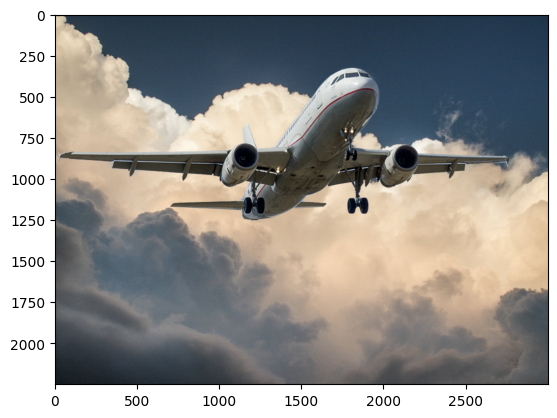

In [64]:
img_path = 'airplane.jpg'
img = image.load_img(img_path, target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0
print('Input image shape:', x.shape)
my_image = Image.open(img_path)
imshow(my_image)
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5), p(6), p(7), p(8), p(9)] = ")
ans=model.predict(x)
print(ans)
print(classes[np.argmax(ans)])

Input image shape: (1, 32, 32, 3)
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5), p(6), p(7), p(8), p(9)] = 
1/1 [==============================] - 0s 34ms/step
[[5.5314525e-04 1.4350725e-05 9.9791783e-01 6.9065027e-05 2.1109272e-05
  6.2586146e-04 1.8128969e-06 3.6414031e-06 7.8243361e-04 1.0796254e-05]]
bird


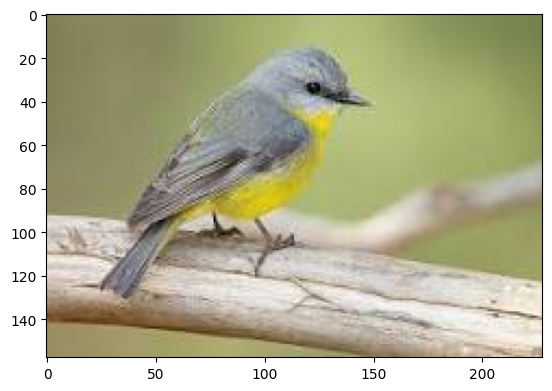

In [66]:
img_path = 'bird1.jpeg'
img = image.load_img(img_path, target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0
print('Input image shape:', x.shape)
my_image = Image.open(img_path)
imshow(my_image)
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5), p(6), p(7), p(8), p(9)] = ")
ans=model.predict(x)
print(ans)
print(classes[np.argmax(ans)])

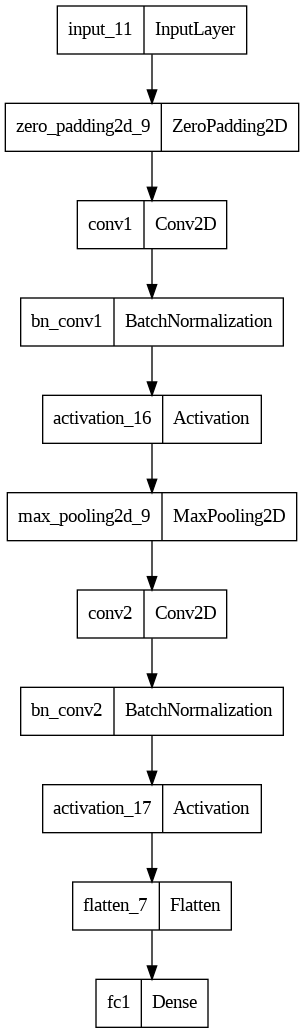

In [68]:
plot_model(model, to_file='model.png')